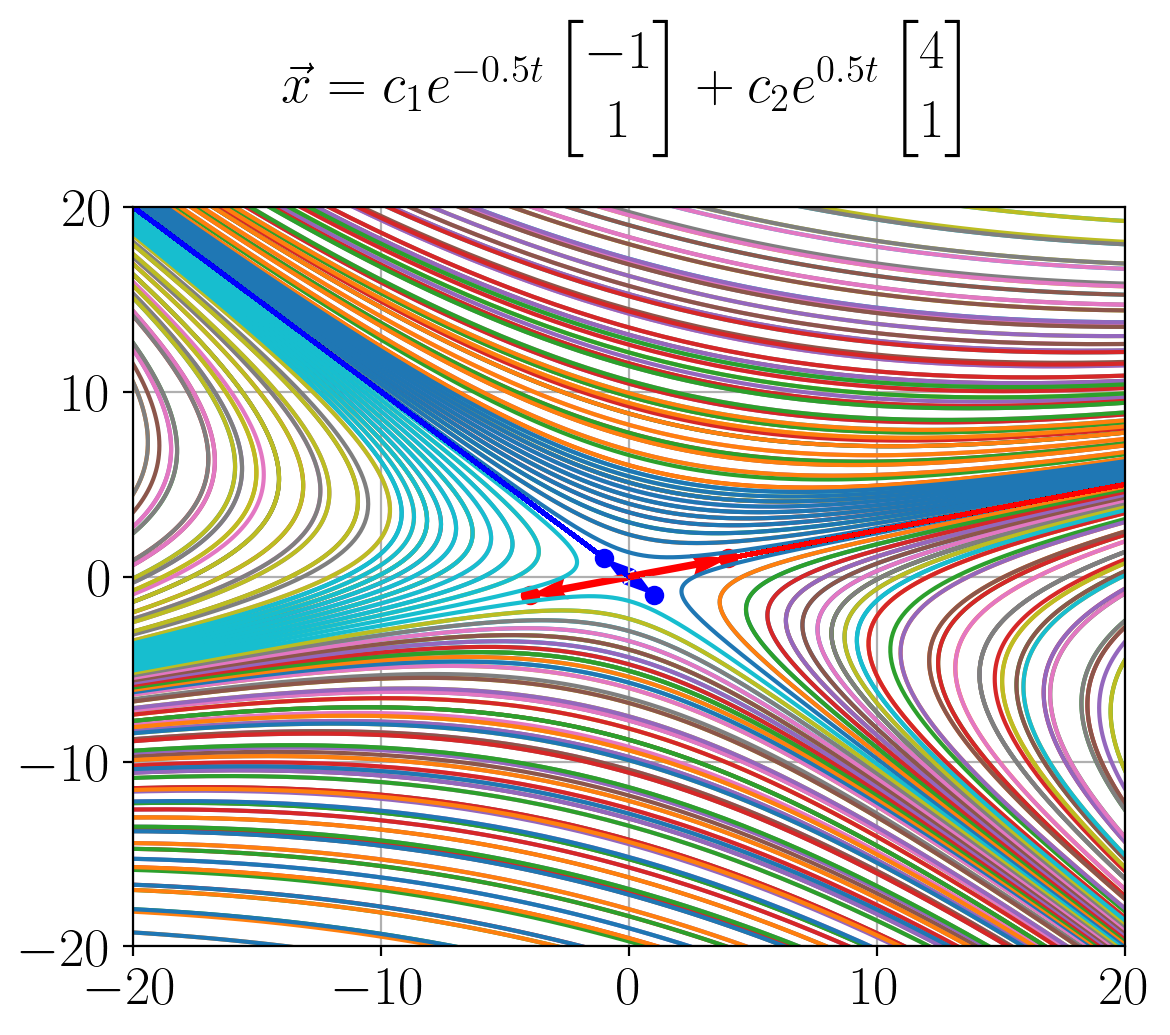

In [1]:
# Import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import cmath

mpl.rcParams['font.size'] = 20
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

#plt.rcParams['figure.dpi'] = 200
#plt.rcParams['savefig.dpi'] = 200

%config InlineBackend.figure_format='retina'
%matplotlib inline

class gen_sln:
    def __init__(self, lam1, lam2, v_e1, v_e2, time_domain_tuple, res):
        
        self.lam1 = lam1
        self.lam2 = lam2

        self.v_e1 = v_e1
        self.v_e2 = v_e2

        num = (time_domain_tuple[1]-time_domain_tuple[0])*res
        self.time_domain = np.linspace(time_domain_tuple[0], time_domain_tuple[1], num = num)

        self.sln_one_data = [[0] * num for i in range(2)]
        self.sln_two_data = [[0] * num for i in range(2)]
    def eigen_vector1(self, color = 'b'):

        plt.scatter(self.v_e1[0],self.v_e1[1], c = color)
        plt.quiver(0,0, self.v_e1[0], self.v_e1[1], angles='xy', scale_units='xy', scale=1., color = color)

        plt.scatter(-1 * self.v_e1[0],-1 * self.v_e1[1], c = color)
        plt.quiver(0,0, -1* self.v_e1[0], -1* self.v_e1[1], angles='xy', scale_units='xy', scale=1., color = color)
    
    def eigen_vector2(self, color = 'r'):

        plt.scatter(self.v_e2[0],self.v_e2[1], c = color)
        plt.quiver(0,0, self.v_e2[0], self.v_e2[1], angles='xy', scale_units='xy', scale=1., color = color)

        plt.scatter(-1 * self.v_e2[0],-1 * self.v_e2[1], c = color)
        plt.quiver(0,0, -1* self.v_e2[0], -1* self.v_e2[1], angles='xy', scale_units='xy', scale=1., color = color)

    def __sln_one(self, color = 'b'):
        i = 0
        for t in self.time_domain:
            self.sln_one_data[0][i] = np.exp(t*self.lam1) * self.v_e1[0]
            self.sln_one_data[1][i] = np.exp(t*self.lam1) * self.v_e1[1]
            i += 1
        plt.plot(self.sln_one_data[0],self.sln_one_data[1], color = color)
        plt.plot(-1 * self.sln_one_data[0],-1 * self.sln_one_data[1], color = color)
        
    def __sln_two(self, color = 'r'):
        i = 0
        for t in self.time_domain:
            self.sln_two_data[0][i] = np.exp(t*self.lam2) * self.v_e2[0]
            self.sln_two_data[1][i] = np.exp(t*self.lam2) * self.v_e2[1]
            i += 1
        plt.plot(self.sln_two_data[0],self.sln_two_data[1], color = color)
        plt.plot(-1 * self.sln_two_data[0],-1 * self.sln_two_data[1], color = color)
    
    def plot_lin_combo(self, c1, c2, color = 'g'):
        self.__sln_one()
        self.__sln_two()

        new_data = [[(c1 * e1) + (c2 * e2) for e1, e2 in zip(li1, li2)] for li1, li2 in zip(self.sln_one_data, self.sln_two_data)]

        plt.plot(new_data[0], new_data[1]) #color = color)


lamda_1 = -1/2
lamda_2 = 1/2


solution_one = gen_sln(lam1 = lamda_1, lam2 = lamda_2, v_e1 = [-1,1], v_e2 = [4,1], time_domain_tuple = (-10,10), res = 25) 

solution_one.eigen_vector1()
solution_one.eigen_vector2()

for i in np.linspace(-10,10, num = 20):
    for j in np.linspace(-10,10, num = 20):
        solution_one.plot_lin_combo(i,j)

plt.title(fr"$\vec{{x}} = c_1 e^{{%s t}} \begin{{bmatrix}} %s \\ %s \end{{bmatrix}} + c_2 e^{{%s t}} \begin{{bmatrix}} %s \\ %s \end{{bmatrix}} $" % (solution_one.lam1, solution_one.v_e1[0], solution_one.v_e1[1], solution_one.lam2, solution_one.v_e2[0], solution_one.v_e2[1]), fontsize = 20, y = 1.12)

# x-lim and y-lim 
plt.xlim(-20, 20) 
plt.ylim(-20, 20) 
  
# Show plot with grid 
plt.grid() 
plt.show() 